In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import os

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
data = pd.read_csv('final_dataset_0.csv')

In [3]:
data['article_id'] = data['article_id'].apply(lambda x: '0' + str(x))

In [4]:
# Load the pre-trained ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

In [5]:
# Function to preprocess and extract features from an image
def extract_features(img_path, model=model, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()

In [6]:
## load the image_features from the local folder
import pickle
with open('image_features.pkl', 'rb') as f:
    image_features = pickle.load(f)

In [7]:
## load the image_path from the local folder
with open('image_paths.pkl', 'rb') as f:
    image_paths = pickle.load(f)

In [8]:
len(image_features), len(image_paths)

(9961, 9961)

In [9]:
def display_image(id):
    img = Image.open(f'{id}')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [10]:
# Function to find top N similar images
def find_similar_images(query_image_path, image_features, top_n=5):
    query_features = extract_features(query_image_path, model)
    similarities = cosine_similarity([query_features], image_features).flatten()
    top_indices = similarities.argsort()[-top_n:][::-1]
    return [image_paths[i] for i in top_indices]

1/1 [==============================] - 0s 128ms/step
Top similar images: ['Images/0723469009.jpg', 'Images/0694848016.jpg', 'Images/0657287001.jpg', 'Images/0694848008.jpg', 'Images/0756898002.jpg', 'Images/0896260001.jpg', 'Images/0628816006.jpg', 'Images/0796454003.jpg', 'Images/0739364002.jpg', 'Images/0736923003.jpg']


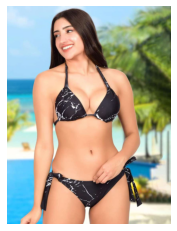

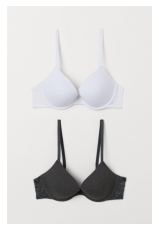

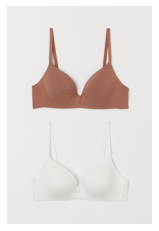

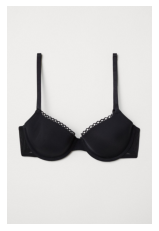

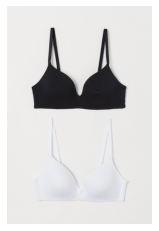

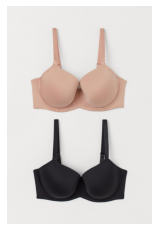

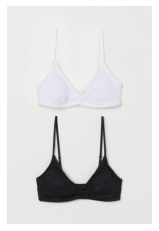

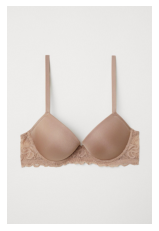

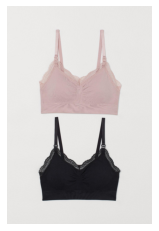

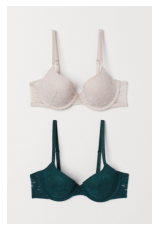

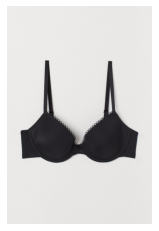

In [15]:
# Example usage
query_image = 'bikini.jpg'
top_similar_images = find_similar_images(query_image, image_features, top_n=10)
print("Top similar images:", top_similar_images)
## display the top similar images
## display test image
display_image('bikini.jpg')
for img_path in top_similar_images:
    display_image(img_path)

In [37]:
ids = []

In [38]:
for i in range(0, len(top_similar_images)):
    x = top_similar_images[i].split('/')[1].split('.')[0]
    ids.append(x)

In [44]:
## display the dataframe where article id is present in ids
data[data['article_id'].isin(ids)]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,embeddings,combined_features,season,price
185,0386859030,386859,T-Shirt Allington R-neck!,255,T-shirt,Garment Upper body,1010016,Solid,93,Dark Green,...,Menswear,23,Men Suits & Tailoring,1003,Knitwear,T-shirt in premium cotton jersey.,[-5.66016585e-02 4.48870398e-02 -5.82196866e-...,T-Shirt Allington R-neck! T-shirt Garment Uppe...,summer,1299
265,0440144001,440144,Curtis Tee,255,T-shirt,Garment Upper body,1010016,Solid,9,Black,...,Menswear,26,Men Underwear,1002,Jersey Basic,Straight-cut cotton jersey T-shirt with a slig...,[-2.46924590e-02 4.50050235e-02 -4.15647402e-...,Curtis Tee T-shirt Garment Upper body Solid Bl...,summer,7849
282,0445419005,445419,Leon tee,255,T-shirt,Garment Upper body,1010016,Solid,10,White,...,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Top in soft, airy modal jersey with a low-cut ...",[-3.87491472e-02 3.36954929e-02 1.41193271e-...,Leon tee T-shirt Garment Upper body Solid Whit...,summer,5899
802,0525815002,525815,R-NECK SS BASIC FIT,255,T-shirt,Garment Upper body,1010016,Solid,9,Black,...,Menswear,26,Men Underwear,1002,Jersey Basic,Round-necked T-shirt in cotton jersey made par...,[-3.46943662e-02 3.70956324e-02 -5.90203442e-...,R-NECK SS BASIC FIT T-shirt Garment Upper body...,summer,6599
803,0525825002,525825,V-NECK SS SLIM FIT,255,T-shirt,Garment Upper body,1010016,Solid,9,Black,...,Menswear,26,Men Underwear,1002,Jersey Basic,V-neck jersey T-shirt in a stretch cotton blen...,[-3.01198270e-02 7.37228245e-02 -2.40702052e-...,V-NECK SS SLIM FIT T-shirt Garment Upper body ...,summer,1799
1894,0591466004,591466,PRINCE ERIC BASIC PROGRAM,255,T-shirt,Garment Upper body,1010025,Slub,73,Dark Blue,...,Menswear,20,Contemporary Smart,1005,Jersey Fancy,T-shirt in slub cotton jersey with sewn-in tur...,[-1.35366302e-02 8.16611499e-02 6.66659176e-...,PRINCE ERIC BASIC PROGRAM T-shirt Garment Uppe...,summer,6849
1930,0593829029,593829,Ronny R-Neck (1),255,T-shirt,Garment Upper body,1010016,Solid,43,Dark Red,...,Menswear,26,Men Underwear,1002,Jersey Basic,Straight-cut jersey T-shirt in a relaxed fit w...,[-4.18754183e-02 2.95181088e-02 -3.79355960e-...,Ronny R-Neck (1) T-shirt Garment Upper body So...,summer,2649
2519,0620316003,620316,Gary Tee,255,T-shirt,Garment Upper body,1010018,Treatment,73,Dark Blue,...,Menswear,55,Contemporary Street,1005,Jersey Fancy,Wide T-shirt in cotton jersey with gently drop...,[-1.11707196e-01 8.56704265e-02 4.52238396e-...,Gary Tee T-shirt Garment Upper body Treatment ...,summer,9549
3484,0653275019,653275,Correy tee.,255,T-shirt,Garment Upper body,1010010,Melange,72,Blue,...,Sport,22,Men H&M Sport,1005,Jersey Fancy,Short-sleeved sports top in fast-drying functi...,[ 1.63291432e-02 7.24849179e-02 3.87336090e-...,Correy tee. T-shirt Garment Upper body Melange...,summer,5649
5269,0711053001,711053,Tess Tee.,255,T-shirt,Garment Upper body,1010016,Solid,23,Dark Yellow,...,Divided,51,Divided Basics,1002,Jersey Basic,Long T-shirt in soft jersey made from a cotton...,[-8.22474957e-02 2.71392297e-02 2.83836611e-...,Tess Tee. T-shirt Garment Upper body Solid Dar...,summer,5699
